# Sistemas de Equações

Resolva o que se pede para os sistemas.

## Importações

In [ ]:
import numpy as np

## 1 - Implemente um código para resolver um sistema linear triangular inferior pelo método das substituições sucessivas.

In [ ]:
n = int(input())

arrayA = [float(input()) for x in range(n**2)]
arrayb = [float(input()) for x in range(n)]

A = np.array(arrayA).reshape((n, n))
b = np.array(arrayb).reshape((n, 1))

def substituicao_sucessiva(A, b):
    x = np.zeros(len(b))
    for i in range(len(b)):
        x[i] = b[i]
        for j in range(i):
            x[i] -= A[i, j] * x[j]
        x[i] /= A[i, i]
    return x

x = substituicao_sucessiva(A, b)

somaX = np.sum(x)
print(f'{somaX:.1f}')

## 2 - Implemente um código para resolver um sistema linear triangular superior pelo método das resoluções retroativas.

In [ ]:
n = int(input())

arrayA = [float(input()) for x in range(n**2)]
arrayb = [float(input()) for x in range(n)]

A = np.array(arrayA).reshape((n, n))
b = np.array(arrayb).reshape((n, 1))

def resolucao_retroativa(A, b):
    x = np.zeros(len(b))
    for i in range(len(b) - 1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, len(b)):
            x[i] -= A[i, j] * x[j]
        x[i] /= A[i, i]
    return x

x = resolucao_retroativa(A, b)

somaX = np.sum(x)
print(f'{somaX:.1f}')

## 3 - Implemente o método da Eliminação de Gauss para resolução de um sistema linear. Resolva a matriz obtida por escalonamento no método de Gauss pela resolução de matrizes triangulares.

In [ ]:
n = int(input())

arrayA = [float(input()) for x in range(n**2)]
arrayb = [float(input()) for x in range(n)]

A = np.array(arrayA).reshape((n, n))
b = np.array(arrayb).reshape((n, 1))
A = np.concatenate((A, b), axis=1)

def gauss(A, b):
  for i in range(len(A)):
    pivo = A[i, i]

    for j in range(i + 1, len(A)):
      fator = A[j, i] / pivo
      A[j, :] = A[j, :] - fator * A[i, :]
      b[j] = b[j] - fator * b[i]

  return A

A = gauss(A, b)

def resolucao_retroativa(A, b):
    x = np.zeros(len(b))
    for i in range(len(b) - 1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, len(b)):
            x[i] -= A[i, j] * x[j]
        x[i] /= A[i, i]
    return x

x = resolucao_retroativa(A, b)

somaX = np.sum(x)
print(f'{somaX:.1f}')

## 4 - Implemente o método da decomposição LU de uma matriz e ao final mostre a soma de L mais U.

In [ ]:
n = int(input())

arrayA = [float(input()) for x in range(n**2)]
A = np.array(arrayA).reshape((n, n))

def decomposicaoLU(A):
  A = A.copy()
  L = np.eye(len(A))

  for i in range(len(A)):
    pivo = A[i, i]

    for j in range(i+1, len(A)):
      fator = A[j, i] / pivo

      L[j, i] = fator
      A[j] = A[j] - (fator * A[i])

  U = A
  return L, U

L, U = decomposicaoLU(A)

soma = np.sum(L + U)
print(f'{soma:.1f}')

# 5 - Implemente um programa que resolva um sistema linear pela decomposição LU e resolva os resultados de L e U pela resolução de matrizes triangulares, as soluções devem ser salvas nas variáveis x e y. Ao final, exiba a soma de L mais U e x mais y.

In [ ]:
n = int(input())

arrayA = [float(input()) for x in range(n**2)]
arrayb = [float(input()) for x in range(n)]

A = np.array(arrayA).reshape((n, n))
b = np.array(arrayb).reshape((n, 1))

def decomposicaoLU(A):
  A = A.copy()
  L = np.eye(len(A))

  for i in range(len(A)):
    pivo = A[i, i]

    for j in range(i+1, len(A)):
      fator = A[j, i] / pivo

      L[j, i] = fator
      A[j] = A[j] - (fator * A[i])

  U = A
  return L, U

L, U = decomposicaoLU(A)

def substituicao_sucessiva(L, b):
    y = np.zeros(len(b))
    for i in range(len(b)):
        y[i] = b[i]
        for j in range(i):
            y[i] -= L[i, j] * y[j]
        y[i] /= L[i, i]
    return y

y = substituicao_sucessiva(L, b)

def resolucao_retroativa(U, b):
    x = np.zeros(len(b))
    for i in range(len(b) - 1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, len(b)):
            x[i] -= U[i, j] * x[j]
        x[i] /= U[i, i]
    return x

x = resolucao_retroativa(U, y)

soma = np.sum(L+U) + np.sum(y+x)
print(f'{soma:.1f}')

## 6 - Implemente o método de Jacobi para a resolução de um sistema linear.

In [ ]:
p = int(input())
itMax = int(input())

n = int(input())

arrayA = [float(input()) for x in range(n**2)]
arrayb = [float(input()) for x in range(n)]
arrayx0 = [float(input()) for x in range(n)]

A = np.array(arrayA).reshape((n, n))
b = np.array(arrayb).reshape((n, 1))
x0 = np.array(arrayx0).reshape((n, 1))

def jacobi(A, b, erro, itMax, x0):
  xOld = x0.copy()

  D_inv = np.linalg.inv(np.diag(np.diag(A)))
  B = -D_inv @ (A - np.diag(np.diag(A)))
  d = D_inv @ b

  it = 0
  er = 1
  x = xOld

  while er >= erro and it < itMax:
    x = B @ xOld + d
    er = np.max(np.abs(x - xOld)) / np.max(np.abs(x))
    xOld = x
    it += 1

  return x, er, it

x, er, it = jacobi(A, b, 10 ** -p, itMax, x0)

somaX = np.sum(x)
print(f'{somaX:.4f} {it} {er:.7f}')

## 7 - Implemente o método de Gauss-Seidel para a resolução de um sistema linear.

In [ ]:
p = int(input())
itMax = int(input())

n = int(input())

arrayA = [float(input()) for x in range(n**2)]
arrayb = [float(input()) for x in range(n)]
arrayx0 = [float(input()) for x in range(n)]

A = np.array(arrayA).reshape((n, n))
b = np.array(arrayb).reshape((n, 1))
x0 = np.array(arrayx0).reshape((n, 1))

def gaussSeidel(A, b, erro, itMax, x0):
  x = x0.copy()

  it = 0
  er = 1

  while er >= erro and it < itMax:
    xOld = x.copy()

    for i in range(len(A)):
      soma1 = np.dot(A[i, :i], x[:i])
      soma2 = np.dot(A[i, i+1:], xOld[i+1:])
      x[i] = (b[i] - soma1 - soma2) / A[i, i]

    er = np.max(np.abs(x - xOld)) / np.max(np.abs(x))
    it += 1

  return x, er, it

x, er, it = gaussSeidel(A, b, 10 ** -p, itMax, x0)

somaX = np.sum(x)
print(f'{somaX:.4f} {it} {er:.7f}')

## 8 - Monte um sistema de equações lineares para o circuito abaixo:

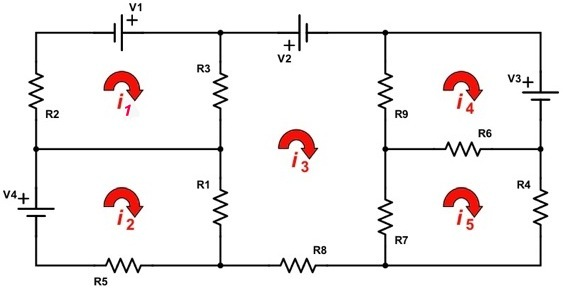

Resistências (RR):

    R1​=12Ω,
    R2​=16Ω,
    R3​=11Ω,
    R4​=10Ω,
    R5​=11Ω,
    R6​=10Ω,
    R7​=27Ω,
    R8​=15Ω,
    R9​=12Ω.

Fontes de Tensão (VV):

    V1​=200V,
    V2​=157V,
    V3​=215V,
    V4​=225V.

In [ ]:
R = np.array([
    [27, 0, -11, 0, 0],
    [0, 23, -12, 0, 0],
    [-11, -12, 77, -12, -27],
    [0, 0, -12, 22, -10],
    [0, 0, -27, -10, 47]
], dtype=float)

V = np.array([
    200,
    225,
    -157,
    -215,
    0
], dtype=float)

print("Matriz R:\n", R)
print("\nMatriz V:\n", V)

Matriz R:
 [[ 27.   0. -11.   0.   0.]
 [  0.  23. -12.   0.   0.]
 [-11. -12.  77. -12. -27.]
 [  0.   0. -12.  22. -10.]
 [  0.   0. -27. -10.  47.]]

Matriz V:
 [ 200.  225. -157. -215.    0.]


## 9 - Use um dos métodos exatos para resolver o sistema e encontre a soma das correntes do circuito.

In [ ]:
def gauss(A, b):
  n = len(A)

  # Eliminação de Gauss
  for i in range(n):
    pivo = A[i, i]
    for j in range(i + 1, n):
        fator = A[j, i] / pivo
        A[j, :] -= fator * A[i, :]
        b[j] -= fator * b[i]

  # Substituição retroativa
  x = np.zeros(n)
  for i in range(len(b) - 1, -1, -1):
      x[i] = b[i]
      for j in range(i + 1, len(b)):
          x[i] -= A[i, j] * x[j]
      x[i] /= A[i, i]

  return x

i = gauss(R, V)

somaI = np.sum(i)
print(f'{somaI:.2f}')

-11.36


## 10 - Monte um sistema de equações lineares para o circuito abaixo:

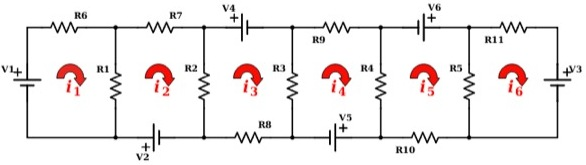

Resistências (RR):

    R1=17Ω,
    R2=15Ω,
    R3=13Ω,
    R4=16Ω,
    R5=23Ω,
    R6=29Ω,
    R7=25Ω,
    R8=30Ω,
    R9=26Ω,
    R10=10Ω,
    R11=20Ω.

Fontes de Tensão (VV):

    V1=181V,
    V2=193V,
    V3=163V,
    V4=206V,
    V5=229V
    V6=153V.

In [ ]:
R = np.array([
    [46, -17, 0, 0, 0, 0],
    [-17, 57, -15, 0, 0, 0],
    [0, -15, 58, -13, 0, 0],
    [0, 0, -13, 55, -16, 0],
    [0, 0, 0, -16, 49, -23],
    [0, 0, 0, 0, -23, 43]
], dtype=float)

V = np.array([
    181,
    193,
    -206,
    -229,
    153,
    -163
], dtype=float)

print("Matriz R:\n", R)
print("\nMatriz V:\n", V)

Matriz R:
 [[ 46. -17.   0.   0.   0.   0.]
 [-17.  57. -15.   0.   0.   0.]
 [  0. -15.  58. -13.   0.   0.]
 [  0.   0. -13.  55. -16.   0.]
 [  0.   0.   0. -16.  49. -23.]
 [  0.   0.   0.   0. -23.  43.]]

Matriz V:
 [ 181.  193. -206. -229.  153. -163.]


## 11 - Utilize o Método de Jacobi para calcular o valor das correntes com 3 algarismos significativos de precisão e indique a soma das correntes obtidas.

In [ ]:
def jacobi(A, b, erro, itMax):
  xOld = np.zeros_like(b)

  D_inv = np.linalg.inv(np.diag(np.diag(A)))
  B = -D_inv @ (A - np.diag(np.diag(A)))
  d = D_inv @ b

  it = 0
  er = 1

  while er >= erro and it < itMax:
    x = B @ xOld + d
    er = np.max(np.abs(x - xOld)) / np.max(np.abs(x))
    xOld = x
    it += 1

  return x, er, it

i, er, it = jacobi(R, V, 10 ** -3, 20)

somaI = np.sum(i)
print(f'{somaI:.3f} {it} {er:.3f}')

-3.846 15 0.001


## 12 - Utilize o Método de Gauss-Seidel para encontrar os valores das correntes com precisão de 3 algarismos significativos e indique a soma das correntes.

In [ ]:
def gaussSeidel(A, b, erro, itMax):
  x = np.zeros((len(A), 1))

  it = 0
  er = 1

  while er >= erro and it < itMax:
    xOld = x.copy()

    for i in range(len(A)):
      soma1 = np.dot(A[i, :i], x[:i])
      soma2 = np.dot(A[i, i+1:], xOld[i+1:])
      x[i] = (b[i] - soma1 - soma2) / A[i, i]

    er = np.max(np.abs(x - xOld)) / np.max(np.abs(x))
    it += 1

  return x, er, it

x, er, it = gaussSeidel(R, V, 10 ** -3, 16)

somaX = np.sum(x)
print(f'{somaX:.3f} {it} {er:.3f}')

-3.842 8 0.001
